In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

Trying to classify and predict whether or not the borrower paid back their loan in full. 

In [2]:
lending_data = pd.read_csv("LoanStats_2019Q1.csv")

In [3]:
lending_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000.0,20000.0,20000.0,60 months,17.19%,499.10,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000.0,12000.0,12000.0,36 months,16.40%,424.26,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3000.0,3000.0,3000.0,36 months,14.74%,103.62,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,35000.0,35000.0,35000.0,36 months,15.57%,1223.08,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,5000.0,5000.0,5000.0,36 months,15.57%,174.73,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
lending_data.keys()

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=144)

In [84]:
lending_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115679 entries, 0 to 115678
Columns: 144 entries, id to settlement_term
dtypes: float64(107), object(37)
memory usage: 127.1+ MB


In [6]:
lending_data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,delinq_2yrs,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,115675.000000,115675.000000,115675.000000,115675.000000,1.156750e+05,0.0,0.0,115418.000000,115675.000000,...,1.0,1.00,1.0,1.0,1.00,1.00,1.0,1.0,1.0,1.0
mean,NaN,16671.263021,16671.263021,16668.042144,481.083874,8.505333e+04,NaN,NaN,20.445427,0.227595,...,3.0,35.21,3.0,11.0,105.63,5636.06,5.9,2839.0,65.0,18.0
std,NaN,10352.132790,10352.132790,10354.685658,290.651469,1.098949e+05,NaN,NaN,20.480562,0.746965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1000.000000,1000.000000,725.000000,30.640000,0.000000e+00,NaN,NaN,0.000000,0.000000,...,3.0,35.21,3.0,11.0,105.63,5636.06,5.9,2839.0,65.0,18.0
25%,NaN,9000.000000,9000.000000,9000.000000,264.940000,4.900000e+04,NaN,NaN,12.210000,0.000000,...,3.0,35.21,3.0,11.0,105.63,5636.06,5.9,2839.0,65.0,18.0
50%,NaN,15000.000000,15000.000000,15000.000000,401.530000,7.000000e+04,NaN,NaN,18.480000,0.000000,...,3.0,35.21,3.0,11.0,105.63,5636.06,5.9,2839.0,65.0,18.0
75%,NaN,24000.000000,24000.000000,24000.000000,648.100000,1.000000e+05,NaN,NaN,25.790000,0.000000,...,3.0,35.21,3.0,11.0,105.63,5636.06,5.9,2839.0,65.0,18.0
max,NaN,40000.000000,40000.000000,40000.000000,1676.230000,9.000000e+06,NaN,NaN,999.000000,21.000000,...,3.0,35.21,3.0,11.0,105.63,5636.06,5.9,2839.0,65.0,18.0


In [161]:
# lending_data.isnull().values.any()
# lending_data.isnull().sum()

In [77]:
# print(lending_data.tail())

In [9]:

lending_data = lending_data

# Inspect the shape
print(lending_data.shape)

(115679, 144)


In [10]:
lending_data["int_rate"]=lending_data["int_rate"].str.replace(r"%","")
lending_data["revol_util"]=lending_data["revol_util"].str.replace(r"%","")
# lending_data["zip_code"]=lending_data["zip_code"].str.replace(r"xx","")
lending_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000.0,20000.0,20000.0,60 months,17.19,499.10,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000.0,12000.0,12000.0,36 months,16.40,424.26,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3000.0,3000.0,3000.0,36 months,14.74,103.62,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,35000.0,35000.0,35000.0,36 months,15.57,1223.08,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,5000.0,5000.0,5000.0,36 months,15.57,174.73,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


"loan_amnt": "int_rate": The interest rate of the loan, as a proportio
"grade": 
"annual_inc": Reported annual income of the borrower. 
"dti": The debt-to-income ratio of the borrower (amount of debt divided by annual income) 
"delinq_2yrs": The number of times the borrower had been 30+ days past due on a payment in the past 2 years. 
"inq_last_6mths": The borrower's number of inquiries by creditors in the last 6 months. 
"open_acc": 
"pub_rec": The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments). 
"revol_bal": The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle). 
"revol_util": The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). 
"total_acc": The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments)                              

In [11]:
lending_df = lending_data[["loan_status", "loan_amnt", "int_rate",'grade', "annual_inc","dti", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc"]]
status = lending_df.groupby("loan_status").count()
status

,loan_amnt,int_rate,grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
loan_status,,,,,,,,,,,,
Charged Off,176,176,176,176,176,176,176,176,176,176,173,176
Current,109176,109176,109176,109176,108936,109176,109176,109176,109176,109176,109063,109176
Fully Paid,4730,4730,4730,4730,4716,4730,4730,4730,4730,4730,4719,4730
In Grace Period,538,538,538,538,537,538,538,538,538,538,538,538
Late (16-30 days),260,260,260,260,259,260,260,260,260,260,260,260
Late (31-120 days),795,795,795,795,794,795,795,795,795,795,793,795


In [12]:
status.describe()

,loan_amnt,int_rate,grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,19279.166667,19279.166667,19279.166667,19279.166667,19236.333333,19279.166667,19279.166667,19279.166667,19279.166667,19279.166667,19257.666667,19279.166667
std,44074.197252,44074.197252,44074.197252,44074.197252,43977.472627,44074.197252,44074.197252,44074.197252,44074.197252,44074.197252,44029.254818,44074.197252
min,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,173.000000,176.000000
25%,329.500000,329.500000,329.500000,329.500000,328.500000,329.500000,329.500000,329.500000,329.500000,329.500000,329.500000,329.500000
50%,666.500000,666.500000,666.500000,666.500000,665.500000,666.500000,666.500000,666.500000,666.500000,666.500000,665.500000,666.500000
75%,3746.250000,3746.250000,3746.250000,3746.250000,3735.500000,3746.250000,3746.250000,3746.250000,3746.250000,3746.250000,3737.500000,3746.250000
max,109176.000000,109176.000000,109176.000000,109176.000000,108936.000000,109176.000000,109176.000000,109176.000000,109176.000000,109176.000000,109063.000000,109176.000000


In [78]:
# status.isnull().values.any()
# status.isnull().sum()

In [14]:

#Create the upsample and downsample
small_sample = lending_df[(lending_df["loan_status"] == "Charged Off") | (lending_df["loan_status"] == "Late (31-120 days)")]
large_sample = lending_df[(lending_df["loan_status"] == "Fully Paid")]


In [15]:
small_sample.head()
large_sample.head()

,loan_status,loan_amnt,int_rate,grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
64,Fully Paid,25200.0,15.57,C,65000.0,15.18,0.0,0.0,4.0,0.0,17271.0,78.50,16.0
87,Fully Paid,17500.0,17.19,C,82000.0,15.70,1.0,0.0,12.0,0.0,15296.0,83.60,27.0
91,Fully Paid,10000.0,13.90,C,90000.0,7.92,0.0,1.0,5.0,0.0,9898.0,58.60,6.0
105,Fully Paid,13750.0,28.80,D,17808.0,30.12,0.0,2.0,6.0,0.0,16814.0,87.60,8.0
133,Fully Paid,10000.0,12.40,B,38000.0,38.66,0.0,0.0,7.0,0.0,8334.0,49,18.0


In [16]:
small_sample = small_sample.dropna()

In [17]:
large_sample = large_sample.dropna()

In [79]:
# small_sample.isnull().values.any()
# large_sample.isnull().sum()

In [19]:
n_class0 = len(small_sample)
n_class1 = len(large_sample)

under = large_sample.sample(n_class0)
sample_df = pd.concat([under, small_sample], axis=0)

len(sample_df)

1930

In [20]:
X = sample_df[["loan_status", "loan_amnt", "int_rate",'grade', "annual_inc","dti", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc"]]
y = sample_df["loan_status"].values.reshape(-1,1)
print(X.shape, y.shape)

(1930, 13) (1930, 1)


Label Definition 
For classification model, both Late status and Charged Off are assigned 0 anD fully Paid is assigned label 1

In [22]:
# We filtered out loans whose statuses are not yet
# final, such as “Current” and “Late (31-120 days)”.
# We treat “Fully Pad” as our positive label 1 , and “Default” or
# “Charged Off” as negative

data_binary_encoded = pd.get_dummies(sample_df, columns=["loan_status"])
data_binary_encoded.head()

,loan_amnt,int_rate,grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status_Charged Off,loan_status_Fully Paid,loan_status_Late (31-120 days)
35161,15000.0,19.92,D,36000.0,63.03,0.0,0.0,14.0,0.0,30275.0,47.20,26.0,0,1,0
6817,3500.0,8.19,A,15000.0,10.00,0.0,0.0,13.0,0.0,2442.0,9.80,27.0,0,1,0
113988,1600.0,20.89,D,18132.0,11.22,0.0,1.0,7.0,0.0,5024.0,41.50,8.0,0,1,0
64593,14000.0,8.19,A,52000.0,21.76,0.0,0.0,12.0,0.0,12140.0,36.30,20.0,0,1,0
29438,12000.0,13.90,C,89360.0,26.16,0.0,0.0,18.0,0.0,4371.0,17.40,25.0,0,1,0


In [87]:
sample_df["loan_category"] = np.where(sample_df["loan_status"] == "Fully Paid", 1, 0) #??? 
sample_df.head(10000)

,loan_status,loan_amnt,int_rate,grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_category
35161,Fully Paid,15000.0,19.92,D,36000.0,63.03,0.0,0.0,14.0,0.0,30275.0,47.20,26.0,1
6817,Fully Paid,3500.0,8.19,A,15000.0,10.00,0.0,0.0,13.0,0.0,2442.0,9.80,27.0,1
113988,Fully Paid,1600.0,20.89,D,18132.0,11.22,0.0,1.0,7.0,0.0,5024.0,41.50,8.0,1
64593,Fully Paid,14000.0,8.19,A,52000.0,21.76,0.0,0.0,12.0,0.0,12140.0,36.30,20.0,1
29438,Fully Paid,12000.0,13.90,C,89360.0,26.16,0.0,0.0,18.0,0.0,4371.0,17.40,25.0,1
28660,Fully Paid,12000.0,7.56,A,89000.0,14.15,0.0,1.0,4.0,0.0,1041.0,3.80,15.0,1
114566,Fully Paid,5000.0,8.81,A,85000.0,9.78,3.0,0.0,11.0,0.0,1626.0,9.80,27.0,1
101151,Fully Paid,11000.0,11.80,B,84897.0,14.12,0.0,0.0,21.0,0.0,5661.0,17.50,26.0,1
44948,Fully Paid,2000.0,6.46,A,44200.0,19.66,0.0,2.0,17.0,0.0,6807.0,14.20,30.0,1
1904,Fully Paid,13000.0,7.02,A,160000.0,11.56,0.0,0.0,10.0,0.0,13061.0,35.10,22.0,1


In [198]:
sample_df['loan_status'].value_counts(normalize=False, dropna=False)

Fully Paid            965
Late (31-120 days)    792
Charged Off           173
Name: loan_status, dtype: int64

In [200]:
sample_df['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid            0.500000
Late (31-120 days)    0.410363
Charged Off           0.089637
Name: loan_status, dtype: float64

In [ ]:
# Dataset of size ....., with (what is the % of negatives and positives)????

In [201]:
sample_df['loan_category'].value_counts(normalize=False, dropna=False)

1    965
0    965
Name: loan_category, dtype: int64

In [33]:
data = sample_df.drop("loan_status", axis=1)
feature_names = data.columns
data.head()

,loan_amnt,int_rate,grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_category
35161,15000.0,19.92,D,36000.0,63.03,0.0,0.0,14.0,0.0,30275.0,47.20,26.0,1
6817,3500.0,8.19,A,15000.0,10.00,0.0,0.0,13.0,0.0,2442.0,9.80,27.0,1
113988,1600.0,20.89,D,18132.0,11.22,0.0,1.0,7.0,0.0,5024.0,41.50,8.0,1
64593,14000.0,8.19,A,52000.0,21.76,0.0,0.0,12.0,0.0,12140.0,36.30,20.0,1
29438,12000.0,13.90,C,89360.0,26.16,0.0,0.0,18.0,0.0,4371.0,17.40,25.0,1


In [80]:
# data.count()

In [48]:
data.isnull().values.any()

False

In [35]:
data_grade = pd.get_dummies(data, columns=["grade"])
data_grade.head(10)

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_category,grade_A,grade_B,grade_C,grade_D,grade_E,grade_G
35161,15000.0,19.92,36000.0,63.03,0.0,0.0,14.0,0.0,30275.0,47.20,26.0,1,0,0,0,1,0,0
6817,3500.0,8.19,15000.0,10.00,0.0,0.0,13.0,0.0,2442.0,9.80,27.0,1,1,0,0,0,0,0
113988,1600.0,20.89,18132.0,11.22,0.0,1.0,7.0,0.0,5024.0,41.50,8.0,1,0,0,0,1,0,0
64593,14000.0,8.19,52000.0,21.76,0.0,0.0,12.0,0.0,12140.0,36.30,20.0,1,1,0,0,0,0,0
29438,12000.0,13.90,89360.0,26.16,0.0,0.0,18.0,0.0,4371.0,17.40,25.0,1,0,0,1,0,0,0
28660,12000.0,7.56,89000.0,14.15,0.0,1.0,4.0,0.0,1041.0,3.80,15.0,1,1,0,0,0,0,0
114566,5000.0,8.81,85000.0,9.78,3.0,0.0,11.0,0.0,1626.0,9.80,27.0,1,1,0,0,0,0,0
101151,11000.0,11.80,84897.0,14.12,0.0,0.0,21.0,0.0,5661.0,17.50,26.0,1,0,1,0,0,0,0
44948,2000.0,6.46,44200.0,19.66,0.0,2.0,17.0,0.0,6807.0,14.20,30.0,1,1,0,0,0,0,0
1904,13000.0,7.02,160000.0,11.56,0.0,0.0,10.0,0.0,13061.0,35.10,22.0,1,1,0,0,0,0,0


In [49]:
data_grade.isnull().values.any()

False

In [36]:

X = data_grade.drop("loan_category", axis=1)
y = data["loan_category"]
print(X.shape, y.shape)

(1930, 17) (1930,)


In [37]:
# import seaborn as sns
# sns.pairplot(data)

In [38]:
from sklearn.preprocessing import StandardScaler
X_transformed =StandardScaler().fit_transform(X)

In [88]:
#2/3 YOUR ORIGINAL DATA SET AS THE TRAINING SET
#1/3 remains will compose the test set.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#EXPLIT THE DATA IN TO ???





In [100]:
#  X_train

In [92]:
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
clf.score(X_test, y_test)

0.5238095238095238

In [94]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [95]:
# Print the r2 score for the test data
# YOUR CODE HERE
print(f"Training Data Score: {clf.score(X_train, y_train)}")
print(f"Testing Data Score: {clf.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.5238095238095238


In [45]:
clusters = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clusters)  # we see an accuracy of 52.3%

0.5238095238095238

In [132]:
importances = clf.feature_importances_
importances

array([0.09083028, 0.1083839 , 0.16503424, 0.11523071, 0.00971292,
       0.03544782, 0.09895258, 0.01389517, 0.11210205, 0.0909274 ,
       0.13602198, 0.00138225, 0.01040197, 0.00651632, 0.001843  ,
       0.0033174 , 0.        ])

{'loan_amnt': [0.09083028071438083], 'int_rate': [0.1083839017032821], 'grade': [0.1650342378428036], 'annual_inc': [0.11523071019245977], 'dti': [0.009712924848485382], 'delinq_2yrs': [0.0354478196713313], 'inq_last_6mths': [0.09895258076166427], 'open_acc': [0.013895169802872035], 'pub_rec': [0.11210204581512735], 'revol_bal': [0.09092740049609559], 'revol_util': [0.13602198403861057], 'total_acc': [0.001382249886324992], 'loan_category': [0.010401973758273881]}


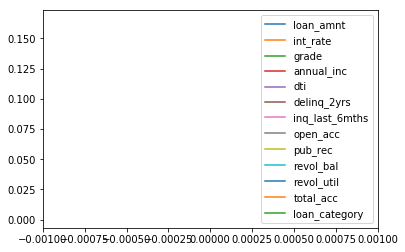

In [193]:
sorted(zip(clf.feature_importances_, feature_names), reverse=True)
# name = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
# name = pd.DataFrame([feature_names, clf.feature_importances_])
name = {}
for x in range(len(feature_names)):
    name[feature_names[x]]= [clf.feature_importances_[x]]
print(name)
# name.transpose()
name2 = pd.DataFrame(name)
name2.plot()

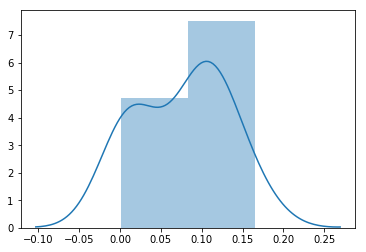

In [195]:
# be sure predicted Defaul is charged of is 0 and full paid is 1 ???
sns.distplot(name2)

"loan_amnt" ranges from $1.0 k to $40 k, with a median of 12k.

In [203]:
sample_df['loan_amnt'].describe()

count     1930.000000
mean     15640.699482
std      10534.962572
min       1000.000000
25%       7500.000000
50%      12000.000000
75%      22000.000000
max      40000.000000
Name: loan_amnt, dtype: float64

In [214]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(sample_df.loc[sample_df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(sample_df[col_name], order=sorted(sample_df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)
    

    
# plot2: bar plot of the variable grouped by loan_status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=sample_df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        Charged_Off_rates = sample_df.groupby(col_name)['loan_status'].value_counts(normalize=True)[:,'Charged Off']
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged Off')
        ax2.set_title('Charged Off Rate by ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde plot of the variable gropued by loan_status
    if continuous:  
        facet = sns.FacetGrid(sample_df, hue = 'loan_status', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='loan_status', data=sample_df, order=sorted(sample_df[col_name].unique()) ) 
     
    plt.tight_layout()    
    


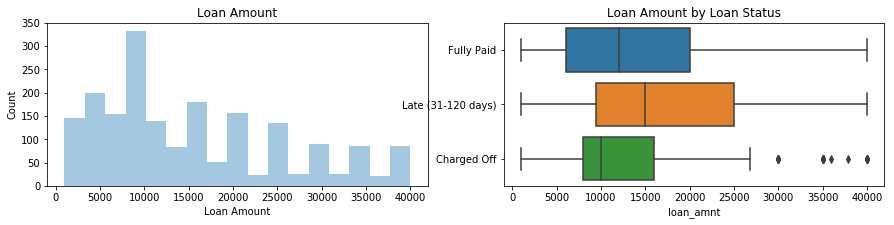

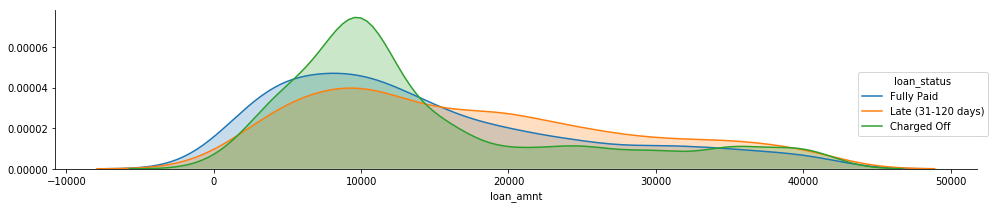

In [210]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

In [96]:
print('Classification Report')
print(classification_report(y_test,clusters))
print('\n')
print('Confusion Matrix')
confusion_matrix(y_test,clusters)

Classification Report
             precision    recall  f1-score   support

          0       0.51      0.58      0.54       236
          1       0.54      0.47      0.50       247

avg / total       0.53      0.52      0.52       483



Confusion Matrix


array([[136, 100],
       [130, 117]])

In [101]:

from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, clusters),
    columns=['Predicted Charged Off', 'Predicted Fully Paid '],
    index=['True Defaul', 'True Paid Off'])


,Predicted Defaul,Predicted Paid off
True Defaul,136,100
True Paid Off,130,117


In [117]:
# X_test
#len(y_test)
#len(clusters)

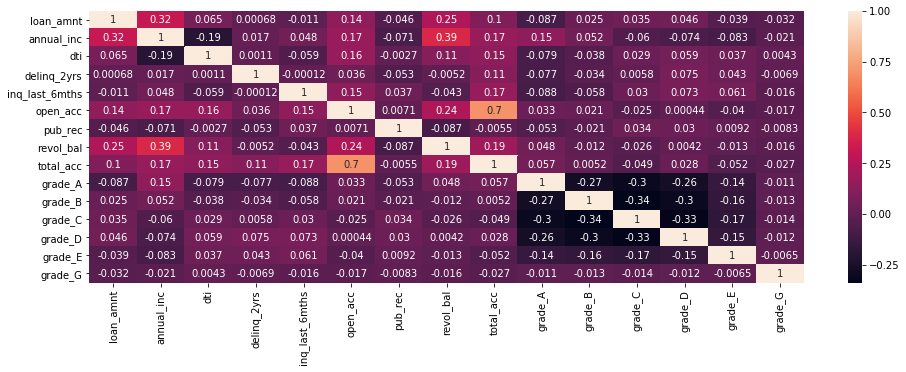

In [130]:

import seaborn as sns
plt.figure(figsize = (16,5))
sns.heatmap(X.corr(), annot=True)

Random Forest


In [113]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000) #n_estimator is number of tree to be used in the forest
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test) 

0.6066252587991718

In [158]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(clusters, rfpredict)

In [115]:
importances = rf.feature_importances_
importances

array([1.10463149e-01, 9.50389274e-02, 1.29925553e-01, 1.34588109e-01,
       1.94557565e-02, 3.45526806e-02, 8.27321917e-02, 1.37158832e-02,
       1.18958280e-01, 1.11219307e-01, 1.08502345e-01, 8.18458234e-03,
       9.12015207e-03, 9.98514637e-03, 8.25005766e-03, 5.18711318e-03,
       1.20766432e-04])

In [116]:
print('Classification Report')
print(classification_report(y_test,rfpredict))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,rfpredict ))

Classification Report
             precision    recall  f1-score   support

          0       0.60      0.61      0.60       236
          1       0.62      0.61      0.61       247

avg / total       0.61      0.61      0.61       483



Confusion Matrix
[[143  93]
 [ 97 150]]


In [53]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.13352182829380999, 'annual_inc'),
 (0.13079282606041615, 'grade'),
 (0.11983063546430762, 'pub_rec'),
 (0.11164252445449714, 'revol_bal'),
 (0.11100837008427956, 'loan_amnt'),
 (0.10709723354933491, 'revol_util'),
 (0.0954675979976074, 'int_rate'),
 (0.08263670360721768, 'inq_last_6mths'),
 (0.034108206168849124, 'delinq_2yrs'),
 (0.019373087822653755, 'dti'),
 (0.013623914525285531, 'open_acc'),
 (0.009479815828514105, 'loan_category'),
 (0.007994179939340054, 'total_acc')]

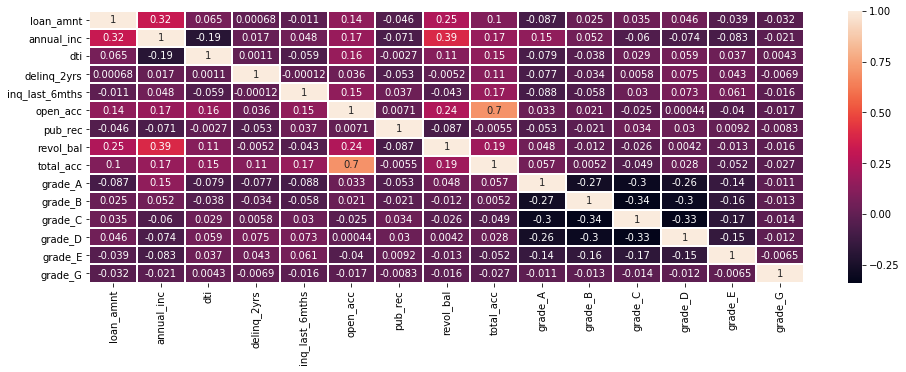

In [148]:
import seaborn as sns
plt.figure(figsize = (16,5))
sns.heatmap(X.corr(), annot=True,  linewidths=1)

In [142]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus 

features = list(X.columns[0:])
features

['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'grade_A',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_G']

<Figure size 1440x720 with 0 Axes>

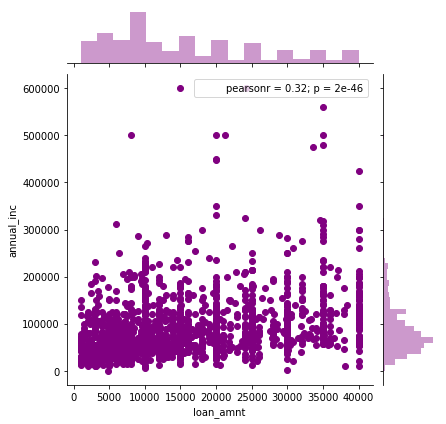

In [159]:

plt.figure(figsize = (20,10))
sns.jointplot(x='loan_amnt',y='annual_inc',data=X, color='purple')

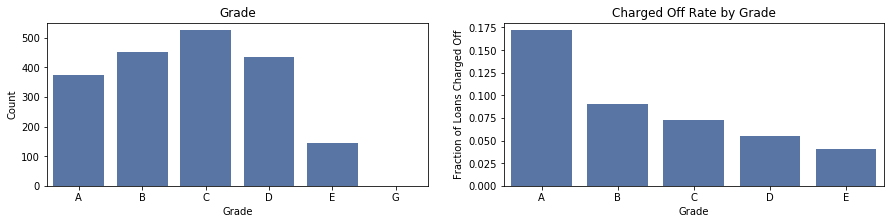

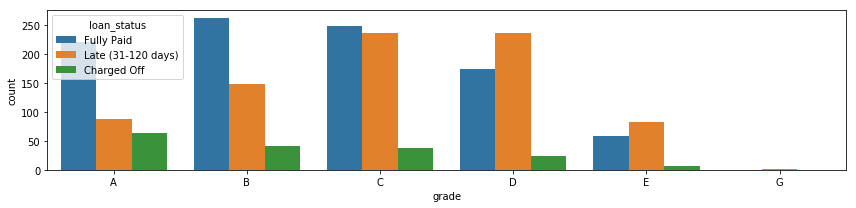

In [215]:
plot_var('grade','Grade',continuous=False)


In [58]:
#from sklearn.metrics import mean_squared_error

# predictions = model.predict(X_test_scaled)
# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = model.score(X_test_scaled, y_test_scaled)

# print(f"MSE: {MSE}, R2: {r2}")